In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)



model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6


/Users/skainzeuton/Desktop/Cornell CS/CDS/SP25/quantization-on-edge/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6175 - sparse_categorical_accuracy: 0.8304 - val_loss: 0.1966 - val_sparse_categorical_accuracy: 0.9433
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.1855 - sparse_categorical_accuracy: 0.9470 - val_loss: 0.1422 - val_sparse_categorical_accuracy: 0.9572
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.1260 - sparse_categorical_accuracy: 0.9643 - val_loss: 0.1172 - val_sparse_categorical_accuracy: 0.9655
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.0965 - sparse_categorical_accuracy: 0.9721 - val_loss: 0.0976 - val_sparse_categorical_accuracy: 0.9696
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.0786 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.0910 - val_sparse_categorical_accuracy: 0.9722
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.0661 - sparse_categorical_accuracy: 0.9804 - val_loss: 0.0827 - val_sparse_categorical_accuracy: 0.9742


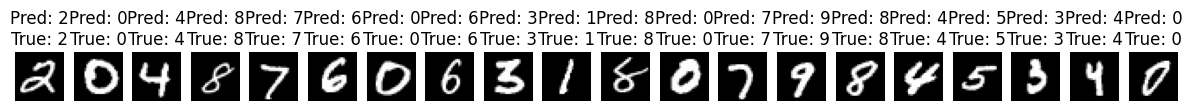

2025-03-15 21:20:28.096423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [9]:
for images, labels in ds_test.take(1):
    predictions = model(images, training=False)
    predicted_labels = tf.argmax(predictions, axis=1)
    fig, axes = plt.subplots(1, 20, figsize=(15, 2))
    for i in range(20):
        axes[i].imshow(images[i].numpy().squeeze(), cmap='gray')
        axes[i].set_title(f"Pred: {predicted_labels[i].numpy()}\nTrue: {labels[i].numpy()}")
        axes[i].axis("off")
    plt.show()

In [10]:
model.save("model.keras")